### Este é um código p[ara acessar a API do BCB
# Fonte: https://analisemacro.com.br/economia/indicadores/coletando-dados-do-banco-central-com-python/

In [1]:
# Import packages

# Importa as bibliotecas

%pip install python-bcb
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
from bcb import sgs

# Define the start date
start_date = '2001-01-01'

# Get the primary result series - In R$ millions
#Includes data from Central Government in Brazil: Federal Government + INSS + BACEN
RP_raw = sgs.get({'RP_month':4639}, start = start_date)

df_RP_raw = pd.DataFrame(RP_raw)



In [3]:
df_RP = df_RP_raw.copy()

In [4]:
'''
Invert values so that:
- negative will means negative primary result (deficit)
+ positive will means positive primary result (surplus)

'''
df_RP['RP_month'] = df_RP['RP_month'] * -1

# Compute the sum of last 12 months for each row
df_RP['RP_12months'] = df_RP['RP_month'].rolling(window=12).sum()


In [5]:
# show the series

df_RP.tail()

,RP_month,RP_12months
Date,,
2023-07-01,-32477.84,-93586.37
2023-08-01,-26181.51,-69994.67
2023-09-01,-16505.56,-97613.25
2023-10-01,19455.64,-108401.95
2023-11-01,-38922.66,-130800.22


<Axes: xlabel='Date'>

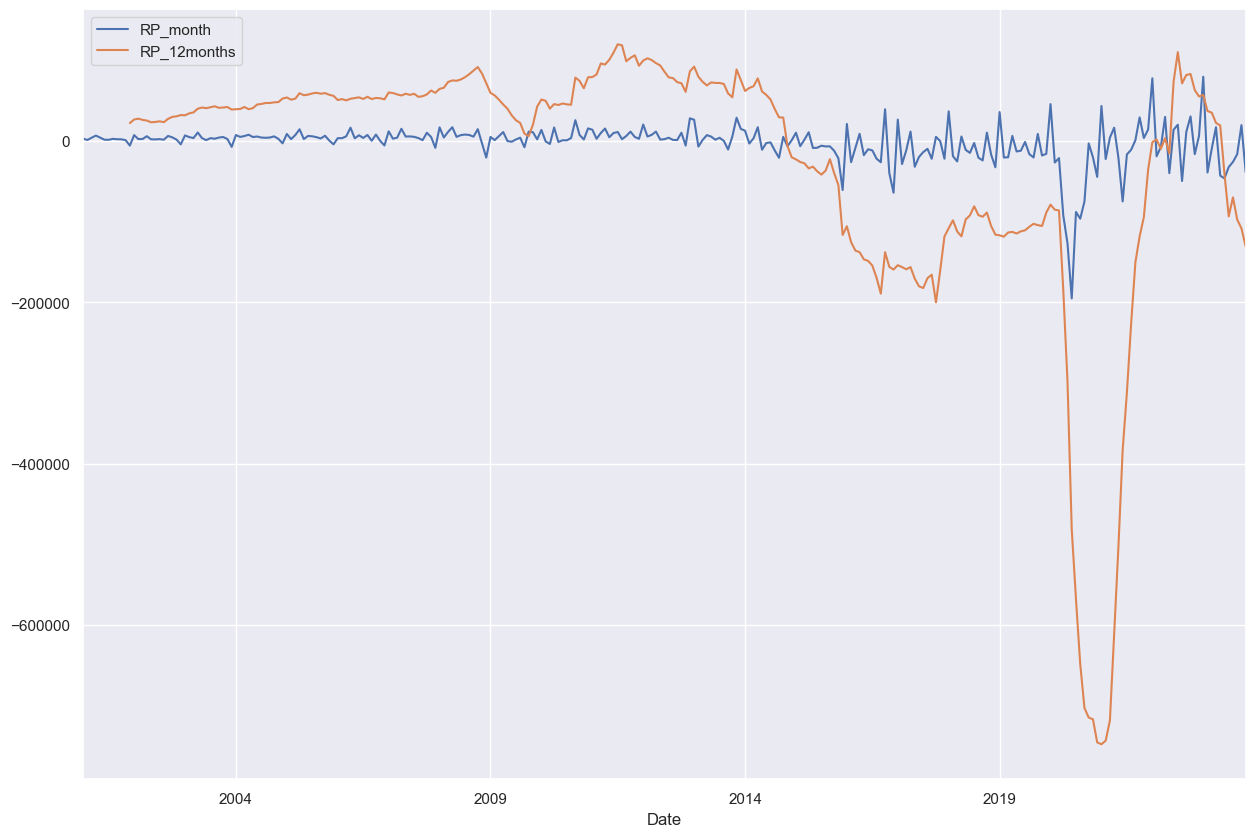

In [6]:
# Plota
sns.set_theme()


df_RP.plot(figsize = (15, 10))


In [13]:
from bcb import PTAX 

# Salva as informações

currency = PTAX()

# Descreve as informações

currency.describe()

EntitySets:
  Moedas
FunctionImports:
  CotacaoMoedaPeriodoFechamento
  CotacaoMoedaAberturaOuIntermediario
  CotacaoMoedaDia
  CotacaoMoedaPeriodo
  CotacaoDolarDia
  CotacaoDolarPeriodo
